### *Regression EDA exercises*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

import wrangle as wr
import explore as ex

**Exercises for ```zillow``` data**

In [2]:
zillow = wr.get_zillow()

In [4]:
zillow.isnull().sum()

id            0
bedrooms      0
bathrooms     0
sq_feet       0
tax_value     0
year_built    0
tax_amount    0
fips          0
dtype: int64

In [5]:
zillow.shape

(1604696, 8)

1. As with encoded vs. unencoded data, we recommend exploring *un-scaled data* in your EDA process.

2. Make sure to perform a ```train```, ```validate```, ```test``` split before and use only your ```train``` dataset to explore the relationships between independent variables with other independent variables or independent variables with your target variable.

In [3]:
zillow, _, _ = wr.split_zillow(zillow)

In [7]:
zillow.shape

(898629, 8)

In [8]:
zillow.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 898629 entries, 1648005 to 1157109
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          898629 non-null  int64  
 1   bedrooms    898629 non-null  uint8  
 2   bathrooms   898629 non-null  float64
 3   sq_feet     898629 non-null  float64
 4   tax_value   898629 non-null  float64
 5   year_built  898629 non-null  float64
 6   tax_amount  898629 non-null  float64
 7   fips        898629 non-null  int64  
dtypes: float64(5), int64(2), uint8(1)
memory usage: 55.7 MB


_**Goal**_: our target variable here is ```tax_value```. We would like to explore how other variables (except ```id``` and ```fips```) are related to ```tax_value```

,bedrooms,bathrooms,sq_feet,tax_value,year_built,tax_amount
bedrooms,1.000000,0.602623,0.631139,0.172941,0.414136,0.176058
bathrooms,0.602623,1.000000,0.769371,0.273834,0.562577,0.272321
sq_feet,0.631139,0.769371,1.000000,0.279017,0.469284,0.275719
tax_value,0.172941,0.273834,0.279017,1.000000,0.200418,0.959701
year_built,0.414136,0.562577,0.469284,0.200418,1.000000,0.197123
tax_amount,0.176058,0.272321,0.275719,0.959701,0.197123,1.000000


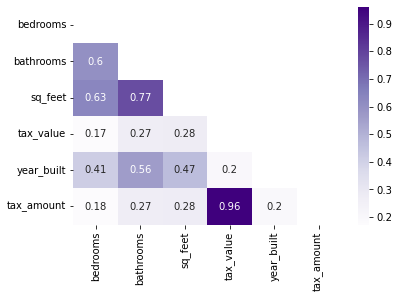

In [4]:
ex.correlation_and_heatmap(zillow)

**Correlation takeaway:**
- there is a strong correlation between ```tax_value``` and ```tax_amount```

3. Write a function named ```plot_variable_pairs``` that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

*The data set is too big for visualizations, let's take its sample of size 100,000 and make visualizations with it*

In [5]:
sample = zillow.sample(100_000, random_state=2912)

In [6]:
# compare sample vs training data set
# slicing in the sample and tr.data removes the column 'id'
round(sample.iloc[:, 1:].describe(), 2) - round(zillow.iloc[:, 1:].describe(), 2)

,bedrooms,bathrooms,sq_feet,tax_value,year_built,tax_amount,fips
count,-798629.00,-798629.00,-798629.00,-798629.00,-798629.00,-798629.00,-798629.00
mean,0.01,0.01,5.03,853.36,0.12,12.88,0.12
std,0.00,0.00,3.22,-129.11,0.05,-4.48,0.11
min,0.00,0.00,18.00,546.00,82.00,16.27,0.00
25%,0.00,0.00,4.00,994.75,0.00,17.39,0.00
50%,0.00,0.00,4.00,567.00,0.00,6.40,0.00
75%,0.00,0.00,4.00,719.00,1.00,9.56,0.00
max,0.00,-2.50,-1843.00,-33.00,-1.00,-77627.61,0.00


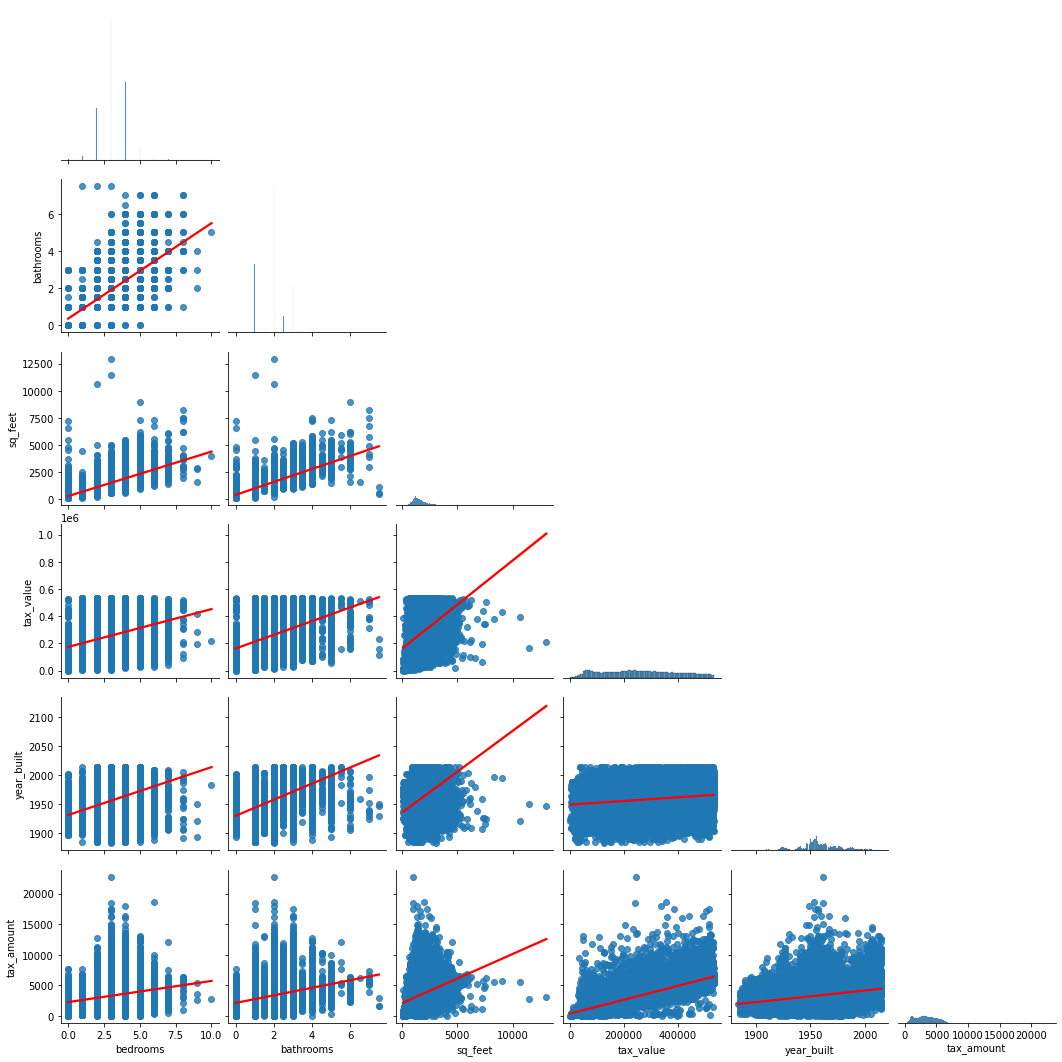

In [7]:
ex.pairplot_data(sample)

4. Write a function named ```plot_categorical_and_continuous_vars``` that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

In [15]:
cat_vars, cont_vars = ex.cat_vars, ex.cont_vars

Categorical Variables:


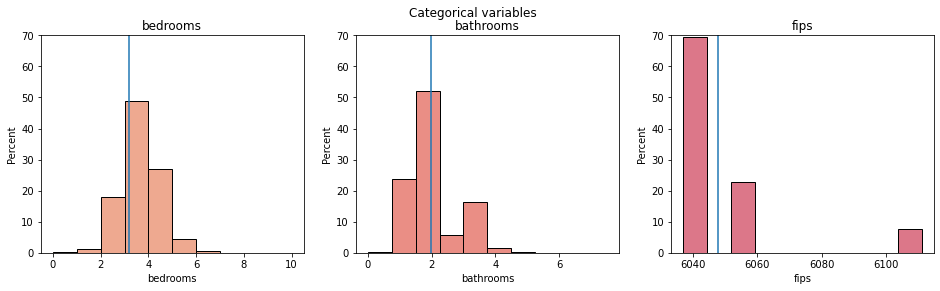

Continuous Variables:
Categorical vs Continuous Variables:


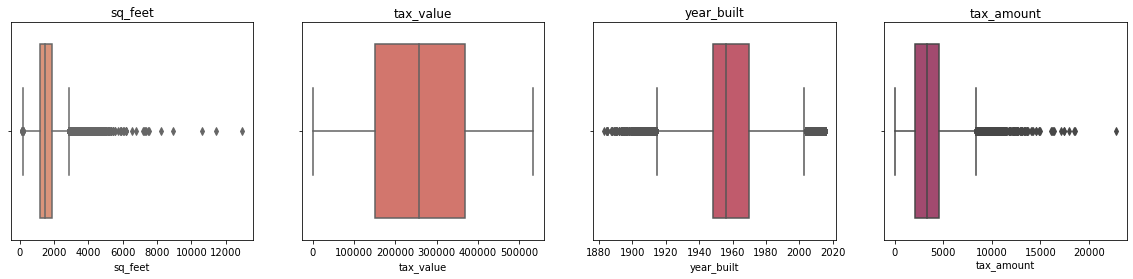

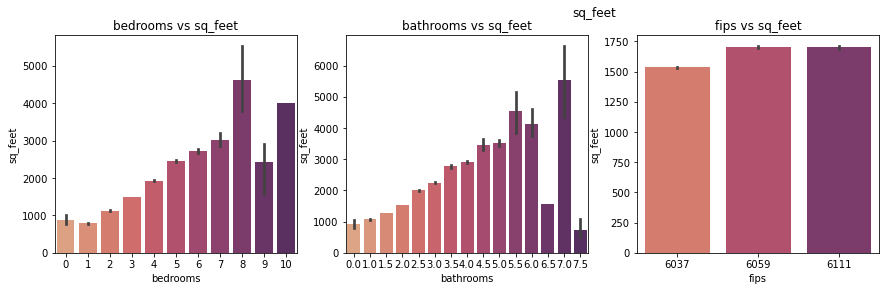

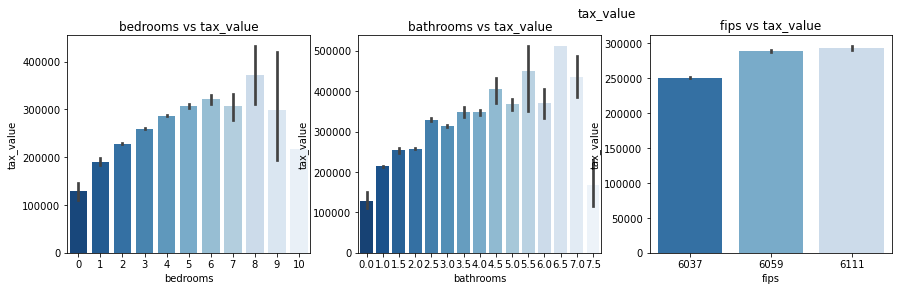

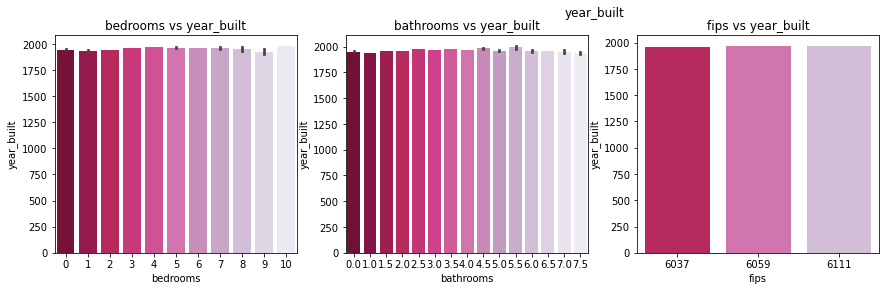

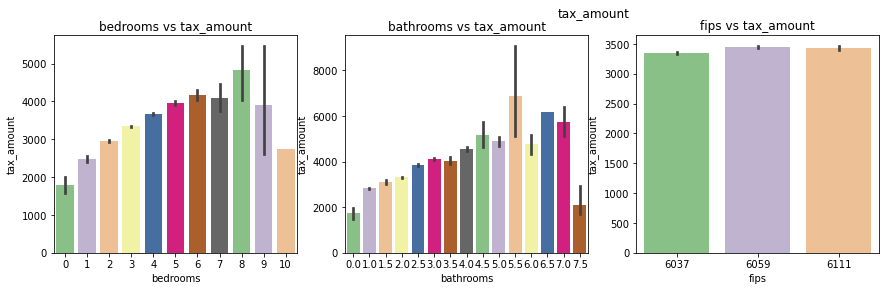

In [10]:
ex.plot_categorical_and_continuous_vars(sample, cat_vars, cont_vars)

In [13]:
#check if it works without passing cat and cont vars
#ex.plot_categorical_and_continuous_vars(sample)

# didn't work. why?

5. Save the functions you have written to create visualizations in your ```explore.py``` file. Rewrite your notebook code so that you are using the functions imported from this file.

*done*

6. Use the functions you created above to explore your Zillow train dataset in your explore.ipynb notebook.

*done*

7. Come up with some initial hypotheses based on your goal of predicting property value.

1. There is a correlation between ```tax_amount``` and ```tax_value```
2. ```tax_value``` peaks at 8 bedrooms and then slowly goes down again
3. ```year_built``` can be safely dropped as it is not correleted with any variable incl. ```tax_value``` at all
4. ```fips``` code vs ```tax_value``` doesn't provide a significant difference, need to check if can be dropped

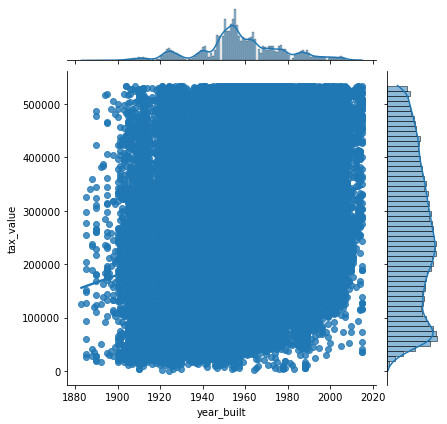

In [17]:
sns.jointplot(data=sample, x=sample.year_built, y=sample.tax_value, kind='reg');

8. Visualize all combinations of variables in some way.

9. Run the appropriate statistical tests where needed.

$H_0:$  There is no linear correlation between ```tax_value``` and ```tax_amount```

$H_a:$  There is no linear correlation between ```tax_value``` and ```tax_amount```

10. What independent variables are correlated with the dependent variable, home value?

In [14]:
# !!! rename tax_vlaue into home_value after this exercise 

11. Which independent variables are correlated with other independent variables (bedrooms, bathrooms, year built, square feet)?

12. Make sure to document your takeaways from visualizations and statistical tests as well as the decisions you make throughout your process.

13. Explore your dataset with any other visualizations you think will be helpful.

In [27]:
# in your for loops you just use indexing to access different palletes or colors 
# in the pallette
# just be sure that you don't go out of the range

palettes = ['flare', 'Blues_r', 'PuRd_r', 'Accent']
colors_sns = sns.color_palette("flare")

In [31]:
colors_sns # colors_sns[i]

[(0.9155979, 0.55210684, 0.42070204),
 (0.888292, 0.40830288, 0.36223756),
 (0.81942908, 0.28911553, 0.38102921),
 (0.69226314, 0.23413578, 0.42480327),
 (0.56041794, 0.19845221, 0.44207535),
 (0.42355299, 0.16934709, 0.42581586)]

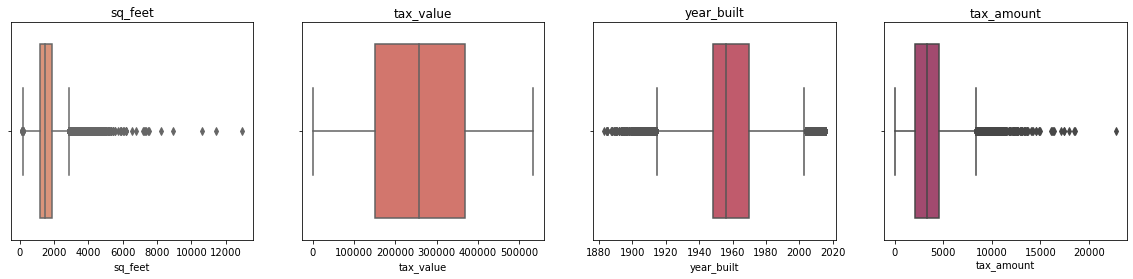

In [29]:
plt.figure(figsize=(20, 4))
for i, col in enumerate(cont_vars):
    plt.subplot(1, 4, i+1)
    plt.title(col)
    sns.boxplot(x=col, data=sample, color=colors_sns[i])